<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/Experimentos_Aleatorizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm  
from scipy import stats  
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/rpasquini/econometrics_and_causality/master/happiness_on_tap_extract.csv')

Extracto de datos de: 

[Devoto, F., Duflo, E., Dupas, P., Parienté, W., & Pons, V. (2012). Happiness on tap: piped water adoption in urban Morocco. American Economic Journal: Economic Policy, 4(4), 68-99.](https://web.stanford.edu/~pdupas/MoroccoWaterConnections.pdf
)

Las variables fueron modificadas para el proposito de este ejercicio. 

**Descripción de variables**


motivacion: Dummy = 1 si el hogar recibió motivación para conexión \
conectado: Dummy = 1 si el hogar se conectó a la red de agua \
sexojefe: Dummy = 1 Masculino, 0 Femenino \
edadjefe: Edad Jefe de Hogar \
jefesabeleer: Dummy=1 Jefe sabe leer \
jefesabeescribir: Dummy=1 Jefe sabe escribir \
pdiasfueaescuela: Porcentaje dias hijos fueron a la escuela.




In [ ]:
df.head()

,random_id,motivacion,conectado,sexojefe,edadjefe,jefesabeleer,jefesabeescribir,pdiasfueaescuela
0,1,0,0,1,37.0,1.0,1.0,NaN
1,3,1,1,1,45.0,0.0,0.0,57.142860
2,5,0,0,1,50.0,1.0,1.0,85.714287
3,7,1,1,1,54.0,1.0,1.0,85.714287
4,8,0,0,2,66.0,0.0,0.0,NaN


In [ ]:
df=df.dropna()

In [ ]:
dias_tratados=df.pdiasfueaescuela.loc[df.motivacion==1]
dias_control=df.pdiasfueaescuela.loc[df.motivacion==0]

## Test de medias (supuesto varianzas son iguales)



In [ ]:
stats.ttest_ind(dias_tratados, dias_control, equal_var=True)

Ttest_indResult(statistic=-1.5002574789125818, pvalue=0.13454932763122404)

#Equivalencia del test a través de estimar OLS 



$pdiasescuela_i=\beta_0+\beta_1motivacion_i+\epsilon_i$

In [ ]:
def ols(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  modeloajustado=modelo.fit()
  print(modeloajustado.summary())
  return modeloajustado

In [ ]:
ols(['pdiasfueaescuela', 'motivacion'], df)

                            OLS Regression Results                            
Dep. Variable:       pdiasfueaescuela   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.251
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.135
Time:                        17:56:55   Log-Likelihood:                -1476.3
No. Observations:                 317   AIC:                             2957.
Df Residuals:                     315   BIC:                             2964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1331      2.116     29.366      0.0

# Randomnization Inference Approach


In [ ]:
# Vamos a utilizar un permutador disponible en Python. Aqui un ejemplo
from itertools import permutations 
l = list(permutations(range(1, 4))) 
print (l)

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


In [ ]:
iterador=permutations(df.motivacion)  #Generamos un iterador de permutaciones. Cada vez que invoquemos la funcion next() sobre él me devolverá una iteracion.
listadediferencias=[]
for i in range(0,10000):
  df['falsotratamiento']=next(iterador)  #usamos la permutacion como si fuese una falsa variable de motivacion
  dias_tratados=df.pdiasfueaescuela.loc[df.falsotratamiento==1]
  dias_control=df.pdiasfueaescuela.loc[df.falsotratamiento==0]
  dif_means=np.mean(dias_tratados)-np.mean(dias_control) #computamos la diferencia de medias
  listadediferencias.append(dif_means)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f112d1099b0>]],
      dtype=object)

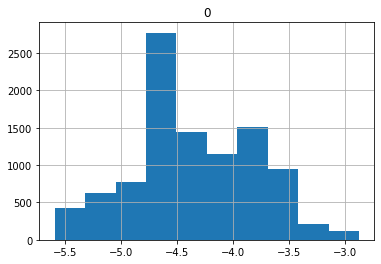

In [ ]:
pd.DataFrame(listadediferencias).hist()

In [ ]:
stats.percentileofscore(listadediferencias,-4.32)

60.55